# 第四章 案例研究: 接口设计

## 4.3 练习

### 1. 写一个函数 square, 接受一个形参 t, 用来表示一只乌龟. 利用乌龟来画一个正方形
  ### 写一个函数调用传入 bob 作为实参来调用 square 函数, 并再运行一遍程序

```python
import turtle
def square(t):
    for i in range(4):
        t.fd(100)
        t.lt(90)

bob = turtle.Turtle()
square(bob)
```

### 2.给 square 函数再添加一个形参 length, 修改函数内容, 保证正方形的长度是length, 并修改函数调用以提供这第二个实参. 再运行一遍程序. 使用不同的 length 值测试你的程序

```python
import turtle

def square(t, l):
    '''画正方形, 自定义边长
    arg:
    t: turtle对象
    l: 边长
    '''
    for i in range(4):
        t.fd(l)
        t.lt(90)

bob = turtle.Turtle()
square(bob, 200)
```

### 3.复制 square 函数, 并命名为 polygon, 再添加一个形参 n 并修改函数体以绘制一个正 n 边形。提示: 正 n 边形的拐角是 360/n 度

```python
import turtle

def polygon(t, l, n):
    '''画多边形, 长度和边数可自定义
    arg:
    t: turtle对象
    l: 边长
    n: 边数
    '''
    for i in range(n):
        t.fd(l)
        t.lt(360/n)

bob = turtle.Turtle()
polygon(bob, 50, 8)
```

### 4. 写一个函数 circle 接受代表乌龟的形参 t, 以及表示半径的形参 r, 并使用合适的长度和边数调用 polygon 画一个近似的圆。 使用不同的 r 值来测试你的函数

```python
import turtle
import math

def polygon(t, l, n):
    for i in range(n):
        t.fd(l)
        t.lt(360/n)
        
def circle(t, r):
    '''画圆, 半径自定义
    arg:
    t: turtle对象
    r: 半径
    '''
    circumference = 2 * math.pi * r  # 获取圆周长
    n = int(circumference / 3) + 1   # 获取边数
    l = circumference / n            # 获取边长
    polygon(t, l, n)
    
bob = turtle.Turtle()
circle(bob, 10)
```

### 5.给 circle 函数写一个 更通用的版本, 称为 arc, 增加一个形参 angle, 用来表示画的圆弧的大小, 这里的 angle 的单位是度数, 所以当 arc = 360时, 则会画一个整圆

```python
import turtle
import math

def polyline(t, n, l, angle):
    '''多边线, 边长, 边数，边的弧度可自定义
    arg:
    n: int, 边数
    l: float, 边长
    angle: int, 边的弧度
    '''
    for i in range(n):
        t.fd(l)
        t.lt(angle)

def polygon(t, l, n):
    '''多边形, 边长，边数可自定义
    arg:
    l: 边长
    n: 边数
    '''
    angle = 360 / n
    polyline(t, n, l, angle)
        
def circle(t, r):
    '''画圆
    r: 半径
    '''
    arc(t, r, 360)
    
    
def arc(t, r, angle):
    '''圆弧
    arg:
    r: 半径
    angle: 圆弧度
    '''
    l = math.pi * r * angle / 180 # 求弧长
    n = int(l / 3) + 1 # 求边数
    step_l = float(l) / n # 求边长
    step_angle = float(angle) / n  # 求边的弧度
    poyline(t, n, step_l, step_angle)
    
bob = turtle.Turtle()
circle(bob, 10, 360)
```

## 4.12 练习

## 练习 4-1

### 1. 画一个栈图来显示函数 circle(bob, radius) 运行时的程序状态。 你可以手动计算， 或者在代码中添加一些 print 语句

```python
def circle(t, r):
    """Draws a circle with the given radius.

    t: Turtle
    r: radius
    """
    arc(t, r, 360)
```
### 其余代码见上5的解答

### 栈图如下

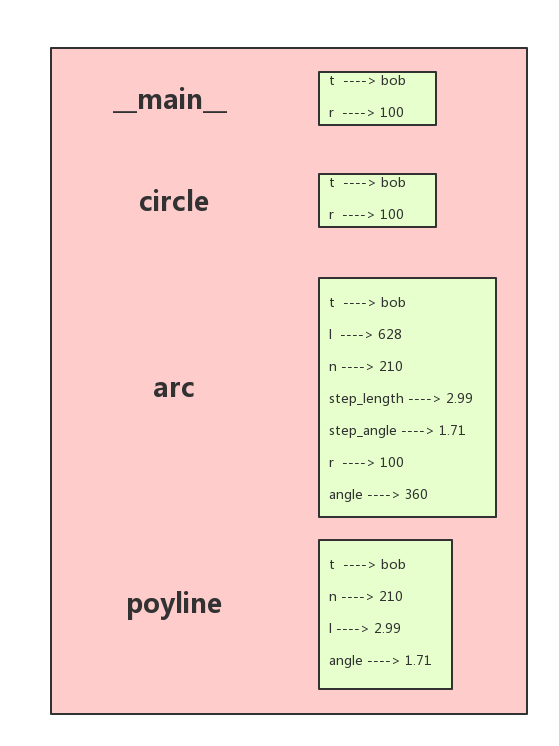

### 2. 在 4.7 节中的 arc 函数并不准确, 因为使用多边形模拟近似圆, 总是会在真实的圆之外。因此, Turtle 画完线之后会停在偏离正确的目标几个像素的地方。 我的解决方案里展示了一种方法可以减少这种错误的效果。 阅读代码是否合理。 如果你自己画图, 可能会发现它是如何生效的

```python
def arc(t, r, angle):
    l = math.pi * r * angle / 180
    n = int(l / 3) + 1
    step_length = l / n
    step_angle = float(angle) / n
    polyline(t, n, step_length, step_angle)     
```
    
### 改善后
```python
def arc(t, r, angle):
    """Draws an arc with the given radius and angle.

    t: Turtle
    r: radius
    angle: angle subtended by the arc, in degrees
    """
    arc_length = 2 * math.pi * r * abs(angle) / 360
    n = int(arc_length / 4) + 3
    step_length = arc_length / n
    step_angle = float(angle) / n

    # making a slight left turn before starting reduces
    # the error caused by the linear approximation of the arc
    t.lt(step_angle/2)
    polyline(t, n, step_length, step_angle)
    t.rt(step_angle/2)
    
if __name__ == '__main__':
    bob = turtle.Turtle()

    # draw a circle centered on the origin
    radius = 100
    bob.pu()
    bob.fd(radius)
    bob.lt(90)
    bob.pd()
    circle(bob, radius)

    # wait for the user to close the window
    turtle.mainloop()
```  
### 结论: 对数据的类型做了校验处理， 让圆的中心以原点为中心,  初始画圆和结束画圆时做了细微的处理，前进二分之一的边

## 练习 4-2

### 写一组合适的通用函数， 用来画出图4-1所示的花朵图形。

```python
import turtle, math

def polyline(t, n, length, angle):
    '''
    根据自定义的边数，边长，角度来画多边线
    '''
    for i in range(n):
        t.fd(length)
        t.lt(angle)
        
def arc(t, r, angle):
    '''
    根据自定义的半径和圆弧角度来画圆弧
    '''
    arc_length = 2 * math.pi * r * abs(angle) / 360
    n = int(arc_length / 4) + 3
    step_length = arc_length / n
    step_angle = float(angle) / n
    t.lt(step_angle/2)
    polyline(t, n, step_length, step_angle)
    t.rt(step_angle/2)
    
def petal(t, r, angle):
    '''
    根据自定义的半径和圆弧度来画花瓣
    '''
    for i in range(2):
        arc(t, r, angle)
        t.lt(180-angle)
        
def flower(t, n, r, angle):
    '''
    根据自定义的花瓣数, 花瓣半径, 花瓣圆弧的弧度角来画花
    '''
    for i in range(n):
        petal(t, r, angle)
        t.lt(360.0/n)

for move(t, length):
    '''
    根据指定的长度length来移动乌龟
    '''
    t.pu()
    t.fd(length)
    t.pd()
    
bob = turtle.Turtle()

move(bob, -100)
flower(bob, 7, 60.0, 60.0)

move(bob, 100)
flower(bob, 10, 40.0, 80.0)

move(bob, 100)
flower(bob, 20, 140.0, 20.0)

bob.hideturle()  # 隐藏乌龟图标
turtle.mainloop() # 等待用户操作
```

## 练习 4-3

### 写一组合适的通用函数, 用来画出图4-2所示的图形

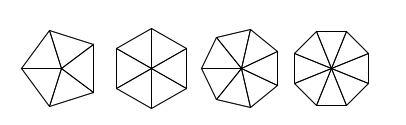


```python
import math
import turtle

def isosceles(t, r, angle):
    '''绘制等腰三角形
    t: Turtle
    r: 等腰三角形的腰长
    angle: 等腰三角形的峰值角度
    '''
    y = r * math.sin(angle * math.pi / 180)
    
    t.rt(angle)     # 右转角度: angle
    t.fd(r)         # 移动距离: r
    t.lt(90+angle)  # 左转角度: 90+angle
    t.fd(2*y)       # 移动距离: 2y
    t.lt(90+angle)  # 左转角度: 90+angle
    t.fd(r)         # 移动距离: r
    t.lt(180-angle) # 左转角度: 180-angle
    
def polypie(t, n, r):
    '''绘制饼图
    t: Turtle
    n: 等腰三角形数量
    r: 等腰三角形的腰长
    '''
    angle = 360.0 / n
    for i in range(n):
        isosceles(t, r, angle/2)
        t.lt(angle)
        
def draw_pie(t, n, r):
    '''绘制饼图, 并移动到右边的距离处
    t: Turtle
    n: 边数
    r: 半径长
    
    '''
    polypie(t, n, r)
    t.pu()           # 笔朝上
    t.fd(r*2 + 10)   # 笔前进130
    t.pd()           # 笔朝下
    
bob = turtle.Turtle()
bob.pu()
bob.bk(130)
bob.pd()

size = 40
draw_pie(bob, 5, size)
draw_pie(bob, 6, size)
draw_pie(bob, 7, size)
draw_pie(bob, 8, size)

bob.hideturtle()
turtle.mainloop()
```